# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [13]:
cols = [x.lower() for x in df.columns]
                         
df.columns = cols

## Change the Index to be the Line Names

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,197615,197616,197617,197618,197619,197620,197621,197622,197623,197624
c/a,A002,A002,A002,A002,A002,A002,A002,A002,A002,A002,...,TRAM2,TRAM2,TRAM2,TRAM2,TRAM2,TRAM2,TRAM2,TRAM2,TRAM2,TRAM2
unit,R051,R051,R051,R051,R051,R051,R051,R051,R051,R051,...,R469,R469,R469,R469,R469,R469,R469,R469,R469,R469
scp,02-00-00,02-00-00,02-00-00,02-00-00,02-00-00,02-00-00,02-00-00,02-00-00,02-00-00,02-00-00,...,00-05-01,00-05-01,00-05-01,00-05-01,00-05-01,00-05-01,00-05-01,00-05-01,00-05-01,00-05-01
station,59 ST,59 ST,59 ST,59 ST,59 ST,59 ST,59 ST,59 ST,59 ST,59 ST,...,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT,RIT-ROOSEVELT
linename,NQR456W,NQR456W,NQR456W,NQR456W,NQR456W,NQR456W,NQR456W,NQR456W,NQR456W,NQR456W,...,R,R,R,R,R,R,R,R,R,R
division,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,BMT,...,RIT,RIT,RIT,RIT,RIT,RIT,RIT,RIT,RIT,RIT
date,08/25/2018,08/25/2018,08/25/2018,08/25/2018,08/25/2018,08/25/2018,08/26/2018,08/26/2018,08/26/2018,08/26/2018,...,08/30/2018,08/30/2018,08/30/2018,08/30/2018,08/31/2018,08/31/2018,08/31/2018,08/31/2018,08/31/2018,08/31/2018
time,00:00:00,04:00:00,08:00:00,12:00:00,16:00:00,20:00:00,00:00:00,04:00:00,08:00:00,12:00:00,...,09:00:00,13:00:00,17:00:00,21:00:00,01:00:00,05:00:00,09:00:00,13:00:00,17:00:00,21:00:00
desc,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,...,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR
entries,6736067,6736087,6736105,6736180,6736349,6736562,6736683,6736696,6736705,6736746,...,5554,5554,5554,5554,5554,5554,5554,5554,5554,5554


In [ ]:
df.T

## Painstakingly change the index back

In [17]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [23]:
df.columns = ['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time','desc', 'entries', 'exits']

In [25]:
df["Num_Lines"] = df["entries"]- df["exits"]

## Write a function to clean a column name

In [29]:
import numpy as np
def clean(col_name):
    cleaned = col_name.lower()
    #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [30]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [31]:
#Checking the output, we can see the results.
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [37]:
df["date"] = pd.to_datetime(df.date)

In [42]:
df["day_of_week"] = df.date.apply(lambda x: x.weekday())

In [43]:
df["day_of_week"][0]

5

In [46]:
df2 = df.copy()

In [47]:
df2["day_of_week"][0]

5

In [50]:
entries = df2.groupby("day_of_week").sum()

In [51]:
entries.head()

,entries,exits,num_lines
day_of_week,,,
0,1114237052454,911938153513,202298898941
1,1143313287046,942230721477,201082565569
2,1123655222441,920630864687,203024357754
3,1122723988662,920691927110,202032061552
4,1110224700078,906799065337,203425634741


In [55]:
entries.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day_of_week')

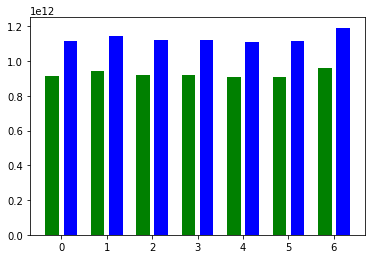

In [67]:
fig, ax = plt.subplots()
p1 = ax.bar(entries.index + .2, entries['entries'], color="b", width=.3, align='center')
p2 = ax.bar(entries.index - .2, entries['exits'], color="g", width=.3, align='center')
ax.autoscale()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [ ]:
#Your code here

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.